In [2]:
import pandas as pd

# Load the dataset we generated
df = pd.read_csv("data/tasks.csv")

# Quick look at the first few rows
df.head()

,task_id,task_length_minutes,priority,category,due_in_days,reminders_set,past_completion_rate,is_weekend,day_of_week,dead_urgency,user_busy_level,completed
0,1,107,low,personal,6,1,0.65,1,1,medium,medium,1
1,2,97,low,study,4,1,0.20,0,0,low,high,1
2,3,19,high,health,9,0,0.26,1,2,medium,low,1
3,4,111,low,personal,13,1,0.91,1,6,low,medium,0
4,5,76,high,health,13,0,0.26,1,1,medium,high,0


## Inspecting dataset

In [3]:
print(df.shape)

(2000, 12)


In [4]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   task_id               2000 non-null   int64  
 1   task_length_minutes   2000 non-null   int64  
 2   priority              2000 non-null   object 
 3   category              2000 non-null   object 
 4   due_in_days           2000 non-null   int64  
 5   reminders_set         2000 non-null   int64  
 6   past_completion_rate  2000 non-null   float64
 7   is_weekend            2000 non-null   int64  
 8   day_of_week           2000 non-null   int64  
 9   dead_urgency          2000 non-null   object 
 10  user_busy_level       2000 non-null   object 
 11  completed             2000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 187.6+ KB


In [5]:
# Statistics for numerical columns
df.describe()

,task_id,task_length_minutes,due_in_days,reminders_set,past_completion_rate,is_weekend,day_of_week,completed
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,91.35850,6.435500,0.500500,0.590045,0.513500,3.019500,0.548000
std,577.494589,50.86046,4.014586,0.500125,0.229089,0.499943,2.013243,0.497815
min,1.000000,5.00000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,500.750000,47.00000,3.000000,0.000000,0.390000,0.000000,1.000000,0.000000
50%,1000.500000,93.00000,6.000000,1.000000,0.580000,1.000000,3.000000,1.000000
75%,1500.250000,135.00000,10.000000,1.000000,0.780000,1.000000,5.000000,1.000000
max,2000.000000,179.00000,13.000000,1.000000,1.000000,1.000000,6.000000,1.000000


In [6]:
print(df.shape[1])
df.columns

12


Index(['task_id', 'task_length_minutes', 'priority', 'category', 'due_in_days',
       'reminders_set', 'past_completion_rate', 'is_weekend', 'day_of_week',
       'dead_urgency', 'user_busy_level', 'completed'],
      dtype='object')

In [7]:
# Check the target balance
df['completed'].value_counts(normalize=True)

completed
1    0.548
0    0.452
Name: proportion, dtype: float64

## Data Visualization

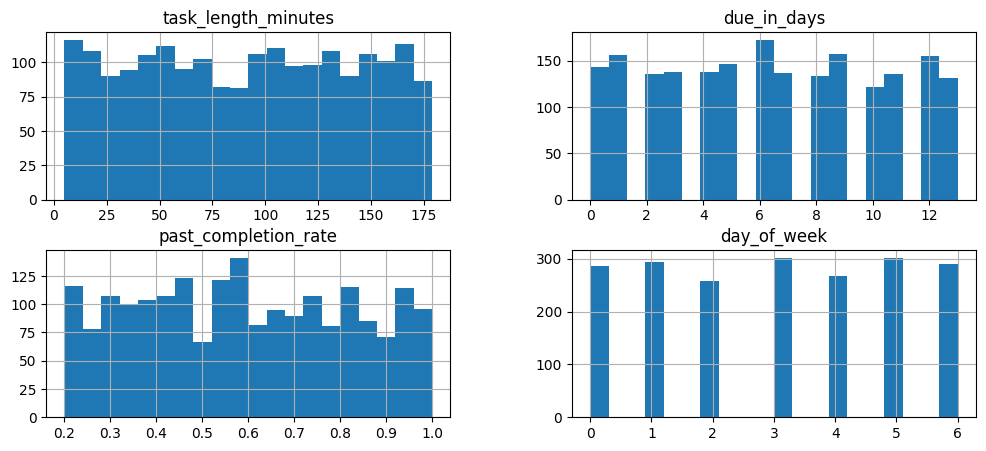

In [8]:
## Numeric Features

import matplotlib.pyplot as plt

numeric_cols = ["task_length_minutes", "due_in_days", "past_completion_rate", "day_of_week"]

df[numeric_cols].hist(bins=20, figsize=(12,5))
plt.show()


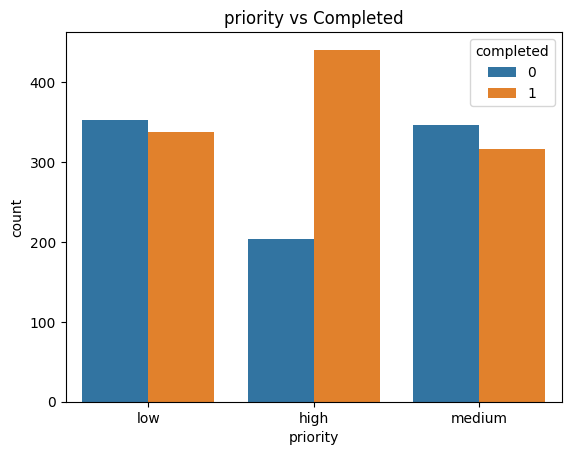

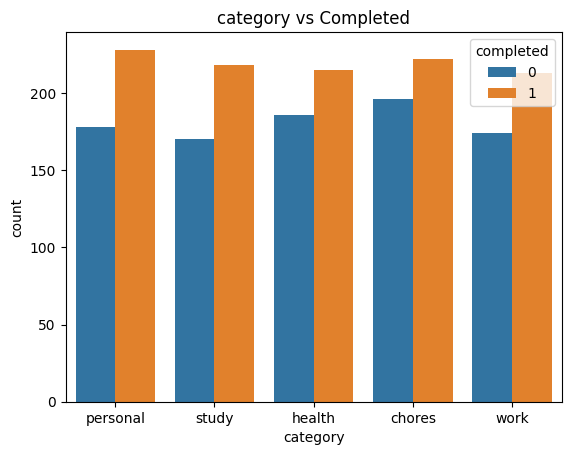

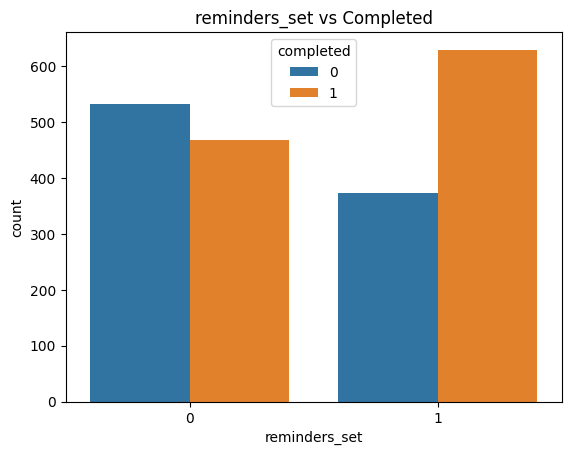

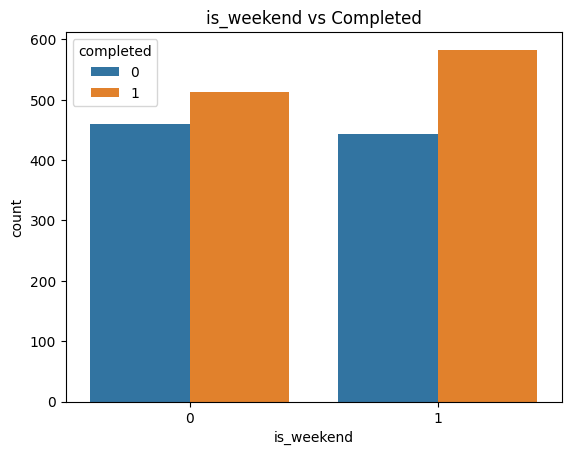

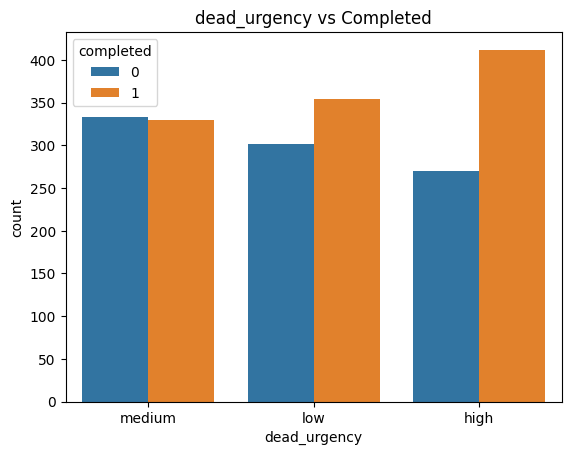

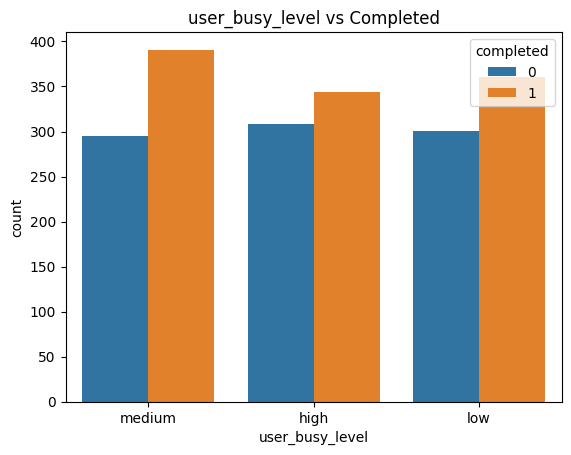

In [9]:
## Categorical features

import seaborn as sns

cat_cols = ["priority", "category", "reminders_set", "is_weekend", "dead_urgency", "user_busy_level"]

for col in cat_cols:
    sns.countplot(data=df, x=col, hue="completed")
    plt.title(f"{col} vs Completed")
    plt.show()


## Prepare data for modeling 

In [11]:
X = df.drop(["completed", "task_id"], axis=1)  # features
y = df["completed"]                             # target


## Data Splicing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
## Handle categorical features (One-Hot Encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols = ["priority", "category"]
num_cols = ["task_length_minutes", "due_in_days", "reminders_set", "past_completion_rate", "is_weekend"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
], remainder="passthrough")

# Example: apply transformation to training data
X_train_encoded = preprocessor.fit_transform(X_train)
X_val_encoded = preprocessor.transform(X_val)
